![DSB Logo](img/Dolan.jpg)
# Using pandas and NumPy
## pandas and NumPy tips and techniques   

http://pandas.pydata.org/pandas-docs/stable/index.html  
https://docs.scipy.org/doc/numpy-dev/reference/index.html#reference  

# Learning Objectives

## Theory / Be able to explain ...
- How pandas extends the functionality of Numpy to provide more functionality and better data handling

## Skills / Know how to  ...
- Convert data from pandas to Numpy and back again
- Use advanced selection techniques to get just the data you want
- Treat time series data just like any other dataset in pandas

# What we've learned so far about NumPy and pandas

**NumPy** is a library for quantitative analysis of tabular data.  
- `ndarray` data structure for normalized tabular data
- universal functions and methods for mathematical calculations and basic I/O

**pandas** is built on top of NumPy to make it easier to use.  
- Includes the full NumPy functionality (including functions, methods, and the `ndarray` data structure)
- Extends the `ndarray` data structure with two new data structures with lots of useful features:
    - `Series` is like a 1D `ndarray` but with more flexibility to handle missing data, odd data types, etc. 
    - `DataFrame` is for 2D data tables; each `DataFrame` is equivalent to a dictionary of `Series`, with each `Series` comprising one *column* of the table

So, that's lots about data structures but not so much about how to actually use pandas and Numpy for analysis!

That's partly because a lot of the most critical functionality for analytics is provided by third-party libraries like sci-kit learn, which you will use in BA 545 for data mining and machine learning applications. 

However, we can and will use pandas and Numpy without the advanced stuff. Let's review some of the basics ... 

# Interoperability
## Making Numpy and pandas share with each other

# Pandas → NumPy → Pandas
**NumPy → Pandas is easy**
- Pandas `pd.Series()` or `pd.DataFrame()` constructors are designed to convert from NumPy arrays.

**Pandas → NumPy can sometimes take some work**
- While NumPy does not reciprocate by taking pandas Series or DataFrames in its `np.array()` constructor, there are several handy methods for exporting DataFrames and Series to `ndarray`s.
- Fortunately, Pandas takes care to minimize inconvenience impersonating NumPy whenever possible.


# First, we need a DataFrame to play with

In [1]:
import numpy as np
import pandas as pd
planets = pd.DataFrame([{'name':'Mercury','diam':4878,'spin':59,'orbit':88,'grav':0.38},
 {'name':'Venus','diam':12104,'spin':243,'orbit':224,'grav':0.9},
 {'name':'Earth','diam':12756,'spin':0.997,'orbit':365.25,'grav':1.0},
 {'name':'Mars','diam':6794,'spin':1.025,'orbit':687,'grav':0.38},
 {'name':'Jupiter','diam':142984,'spin':0.413,'orbit':4329,'grav':2.64},         
 {'name':'Saturn','diam':120536,'spin':0.44375,'orbit':10592.25,'grav':1.16},
 {'name':'Uranus','diam':51118,'spin':0.71805,'orbit':30681,'grav':1.11},
 {'name':'Neptune','diam':49532,'spin':0.67153,'orbit':60193.2,'grav':1.21}])
planets.set_index('name',inplace=True)
planets

,diam,grav,orbit,spin
name,,,,
Mercury,4878,0.38,88.00,59.00000
Venus,12104,0.90,224.00,243.00000
Earth,12756,1.00,365.25,0.99700
Mars,6794,0.38,687.00,1.02500
Jupiter,142984,2.64,4329.00,0.41300
Saturn,120536,1.16,10592.25,0.44375
Uranus,51118,1.11,30681.00,0.71805
Neptune,49532,1.21,60193.20,0.67153


# `DataFrame`s posing as `ndarray`s
**Technical details**
- pandas arrays (Series and DataFrames) implement NumPy's `NDFrame` interface (spec) for the `ndarray` class
- pandas also uses `ndarray` objects internally, for now

**Implications for Pandas**
- pandas arrays can generally be used anywhere one can use NumPy `ndarray`s
- pandas provides utilities to handle occasional incompatibilities


In [2]:
# use a NumPy Universal Function on a Series
np.log(planets['orbit'])

name
Mercury     4.477337
Venus       5.411646
Earth       5.900582
Mars        6.532334
Jupiter     8.373092
Saturn      9.267878
Uranus     10.331399
Neptune    11.005315
Name: orbit, dtype: float64

# The pandas `values` Attribute
Pandas uses `ndarray`s internally to store data. These arrays can be accessed directly using the `values` attribute. 

In [3]:
# Access the interval ndarray
planets_ndarray = planets['orbit'].values
print(type(planets_ndarray))
planets_ndarray

<class 'numpy.ndarray'>


array([   88.  ,   224.  ,   365.25,   687.  ,  4329.  , 10592.25,
       30681.  , 60193.2 ])

In [4]:
# We can then modify the original 'orbit' column by directly editing planets_ndarray 
planets_ndarray[1] = 5
planets

,diam,grav,orbit,spin
name,,,,
Mercury,4878,0.38,88.00,59.00000
Venus,12104,0.90,5.00,243.00000
Earth,12756,1.00,365.25,0.99700
Mars,6794,0.38,687.00,1.02500
Jupiter,142984,2.64,4329.00,0.41300
Saturn,120536,1.16,10592.25,0.44375
Uranus,51118,1.11,30681.00,0.71805
Neptune,49532,1.21,60193.20,0.67153


In [5]:
planets_ndarray[1] = 224.00
planets

,diam,grav,orbit,spin
name,,,,
Mercury,4878,0.38,88.00,59.00000
Venus,12104,0.90,224.00,243.00000
Earth,12756,1.00,365.25,0.99700
Mars,6794,0.38,687.00,1.02500
Jupiter,142984,2.64,4329.00,0.41300
Saturn,120536,1.16,10592.25,0.44375
Uranus,51118,1.11,30681.00,0.71805
Neptune,49532,1.21,60193.20,0.67153


# Caveat
The `values` attribute is read-only if a DataFrame has heterogeneous columns.

In [6]:
planets_ndarray = planets.values # note: all columns
planets_ndarray[1][2] = 5 # has no effect b/c the columns are not the same type.
planets 

,diam,grav,orbit,spin
name,,,,
Mercury,4878,0.38,88.00,59.00000
Venus,12104,0.90,224.00,243.00000
Earth,12756,1.00,365.25,0.99700
Mars,6794,0.38,687.00,1.02500
Jupiter,142984,2.64,4329.00,0.41300
Saturn,120536,1.16,10592.25,0.44375
Uranus,51118,1.11,30681.00,0.71805
Neptune,49532,1.21,60193.20,0.67153


# The `.to_records()` Method
The `.to_records()` method returns a NumPy `rec.array` with NumPy-style `dtype` specs. This can be handy for certain use cases where a `rec.array` is required.

In [7]:
planets_recarray = planets.to_records()
planets_recarray

rec.array([('Mercury',   4878, 0.38,    88.  ,  59.     ),
           ('Venus',  12104, 0.9 ,   224.  , 243.     ),
           ('Earth',  12756, 1.  ,   365.25,   0.997  ),
           ('Mars',   6794, 0.38,   687.  ,   1.025  ),
           ('Jupiter', 142984, 2.64,  4329.  ,   0.413  ),
           ('Saturn', 120536, 1.16, 10592.25,   0.44375),
           ('Uranus',  51118, 1.11, 30681.  ,   0.71805),
           ('Neptune',  49532, 1.21, 60193.2 ,   0.67153)],
          dtype=[('name', 'O'), ('diam', '<i8'), ('grav', '<f8'), ('orbit', '<f8'), ('spin', '<f8')])

# pandas Functions and Methods
## Useful extensions to Numpy

# Descriptive Statistics
NumPy includes lots of Universal Functions and methods to calculate things like means, moving averages, etc. Basically, if you can do something in Excel with a range of data, then you can likely find an equivalent in NumPy and, by extension, in pandas.

pandas then provides even more flexible ways to use NumPy stats on Series and DataFrames. 

In [8]:
# .mean() of a Series
planets['diam'].mean()

50087.75

In [9]:
# .describe() with mean, mode, ... for a DataFrame
planets.describe()

,diam,grav,orbit,spin
count,8.000000,8.000000,8.000000,8.000000
mean,50087.750000,1.097500,13394.962500,38.283541
std,53916.250627,0.704491,21582.877545,85.195860
min,4878.000000,0.380000,88.000000,0.413000
25%,10776.500000,0.770000,329.937500,0.614585
50%,31144.000000,1.055000,2508.000000,0.857525
75%,68472.500000,1.172500,15614.437500,15.518750
max,142984.000000,2.640000,60193.200000,243.000000


In [10]:
# histogram counts for a Series
planets['spin'].value_counts(bins=3)

(0.169, 81.275]      7
(162.138, 243.0]     1
(81.275, 162.138]    0
Name: spin, dtype: int64

**Need more stats? Just [RTFM](https://pandas.pydata.org/pandas-docs/stable/api.html#api-dataframe-stats)**

# Selecting Just the Data You Need
Usually, we will want to apply our stats to subsets of the data. 

For example:  
Let's say we have a dataset with the waist-to-hip ratio and gender for every student at Fairfield University. (How would we get that? IDK.)
While calculating the average w2h ratio over all students might be moderately interesting, **it would not be particularly useful**. 

Instead we might want to 
- Compile histograms for male and female students
- Compare waist-to-hip ratios of first semester freshmen with first semester sophomores (freshman 15, anyone?)
- Segment the w2h data into categories that correlate to other medically-relevant health data. (Do tall people tend to have different w2h ratios from short people?)

**To do any of these things we need to slice and dice our data in ways that go well beyond what we can do in vanilla Python or Numpy.**

# Four different ways to select data
- Selecting and Slicing with `[]`
- Selection with `.loc()` and `.iloc()`
- Queries and other advanced selection techniques
- Joins and other relational DB operations

# Standard Selection with `[]`

In [11]:
# Slicing by rows (like a list)
planets[:2]

,diam,grav,orbit,spin
name,,,,
Mercury,4878,0.38,88.0,59.0
Venus,12104,0.90,224.0,243.0


In [12]:
# Selection by columns (like a dictionary)
planets['diam'][:2] # note that that's [Columns][Rows] 

name
Mercury     4878
Venus      12104
Name: diam, dtype: int64

# Selection with `.loc()` and `.iloc()` methods
- `.loc()` is used to *select by labels*
- `.iloc()` is used to *select by position*  
- Both attributes use 2D slicing notation (with commas)  
    `[from_row : to_row, from_col : to_col]`

In [13]:
# Select rows by labels and columns by names
planets.loc['Venus':'Mars','diam':'orbit']

,diam,grav,orbit
name,,,
Venus,12104,0.90,224.00
Earth,12756,1.00,365.25
Mars,6794,0.38,687.00


In [14]:
# Select rows by position and columns by order
planets.iloc[1:3,:3]

,diam,grav,orbit
name,,,
Venus,12104,0.9,224.00
Earth,12756,1.0,365.25


# Advanced Selection Techniques
Pandas includes lots of other functions and methods for subsets of 2D data sets. 
- Random sampling with `.sample()`
- Boolean selections with `.query()`
- In-place filtering with `.where()` and `.mask()`

# Random Sampling with `.sample()`
To select (uniform) random rows from a DataFrame, just use the `.sample()` method. Every method call returns a new random sample. 

In [15]:
planets.sample(n=2)

,diam,grav,orbit,spin
name,,,,
Mercury,4878,0.38,88.0,59.00000
Neptune,49532,1.21,60193.2,0.67153


In [16]:
planets.sample(n=2)

,diam,grav,orbit,spin
name,,,,
Neptune,49532,1.21,60193.2,0.67153
Mercury,4878,0.38,88.0,59.00000


# Boolean Selections with `.query()`
You can select rows based on boolean expressions. You can even use expressions with multiple columns. In the expression just refer to each column by name.

In [17]:
planets.query('spin < 1 and orbit > 365.25')

,diam,grav,orbit,spin
name,,,,
Jupiter,142984,2.64,4329.00,0.41300
Saturn,120536,1.16,10592.25,0.44375
Uranus,51118,1.11,30681.00,0.71805
Neptune,49532,1.21,60193.20,0.67153


# Element Filtering with `.where()` and `.mask()`
Given a DataFrame of a given shape, `.where()` returns a DataFrame of the same shape except with `NaN` for any elements that don't fit the boolean expression.

In [18]:
planets.where(planets['spin'] > 1) # keep the rows with spin > 1

,diam,grav,orbit,spin
name,,,,
Mercury,4878.0,0.38,88.0,59.000
Venus,12104.0,0.90,224.0,243.000
Earth,NaN,NaN,NaN,NaN
Mars,6794.0,0.38,687.0,1.025
Jupiter,NaN,NaN,NaN,NaN
Saturn,NaN,NaN,NaN,NaN
Uranus,NaN,NaN,NaN,NaN
Neptune,NaN,NaN,NaN,NaN


`.mask()` is the complement (reverse) of `.where()`, with `NaN` for all elements that fit the boolean expression. 

In [19]:
planets.mask(planets['spin'] > 1) # keep the rows with spin <= 1

,diam,grav,orbit,spin
name,,,,
Mercury,NaN,NaN,NaN,NaN
Venus,NaN,NaN,NaN,NaN
Earth,12756.0,1.00,365.25,0.99700
Mars,NaN,NaN,NaN,NaN
Jupiter,142984.0,2.64,4329.00,0.41300
Saturn,120536.0,1.16,10592.25,0.44375
Uranus,51118.0,1.11,30681.00,0.71805
Neptune,49532.0,1.21,60193.20,0.67153


# Database-Style DataFrame Joins
What if we need to cross-reference rows in one DataFrame with rows in another DataFrame?  

The `merge()` function returns a SQL-style join on two DataFrames.
- inner join, left outer join, right outer join, etc. 
- where is implemented with slicing, loc, iloc, etc.

In [20]:
population = pd.DataFrame({'pop':{'Earth':7500000000}})
population

,pop
Earth,7500000000


In [21]:
pd.merge(planets,population,left_on='name',right_index=True)

,diam,grav,orbit,spin,pop
name,,,,,
Earth,12756,1.0,365.25,0.997,7500000000


In many cass we can use the `.join()` method to get a more convenient, SQL-like syntax. 

In [22]:
planets.join(population,how='inner') # an inner join

,diam,grav,orbit,spin,pop
Earth,12756,1.0,365.25,0.997,7500000000


In [23]:
planets.join(population,how='left') # a left join

,diam,grav,orbit,spin,pop
name,,,,,
Mercury,4878,0.38,88.00,59.00000,NaN
Venus,12104,0.90,224.00,243.00000,NaN
Earth,12756,1.00,365.25,0.99700,7.500000e+09
Mars,6794,0.38,687.00,1.02500,NaN
Jupiter,142984,2.64,4329.00,0.41300,NaN
Saturn,120536,1.16,10592.25,0.44375,NaN
Uranus,51118,1.11,30681.00,0.71805,NaN
Neptune,49532,1.21,60193.20,0.67153,NaN


In [24]:
planets.join(population,how='right') # a right join

,diam,grav,orbit,spin,pop
Earth,12756,1.0,365.25,0.997,7500000000


# Working with Time Series Data
## With an assist from Pandas

Ref: https://pandas.pydata.org/pandas-docs/stable/timeseries.html

# The `datetime` Module
Standard library’s `datetime` module knows all about dates and times.

In [25]:
from datetime import date, datetime
print(date.today())    # today's date
print(datetime.now())  # the current time

2018-10-28
2018-10-28 19:50:39.204352


Ref: https://docs.python.org/3/library/datetime.html#module-datetime

# The `time` Module
The standard `time` module handles time arithmetic, timezones, formatting, etc. Try not to get it confused with `datetime.time`.  
Fun fact: Time is stored as a floating point number, the number of seconds since midnight of January 1, 1970.

In [26]:
import time
time.time() # the current time

1540770639.2126908

Neat, eh? However, **most of the time you probably want `datetime.time`.**  

Ref: https://docs.python.org/3/library/time.html

# Time Series in pandas
Pandas arrays (Series or DataFrame) can be indexed using `timestamp`s instead of numbers or string labels. That makes slicing and dicing time pretty easy.

In [28]:
aapl_5d = pd.Series(
    [158.67,158.73,156.07,153.39,151.89],
    index=pd.date_range('2017-9-18',periods=5,freq='D')) 

2017-09-18    158.67
2017-09-19    158.73
2017-09-20    156.07
2017-09-21    153.39
2017-09-22    151.89
Freq: D, dtype: float64

Note that `pd.date_range()` works just like `range()` but with `datetimes` instead of integers.  
Ref: https://pandas.pydata.org/pandas-docs/stable/timeseries.html

# The `DatetimeIndex` Type
When a date range is used as an index, pandas automatically converts it to a `DatetimeIndex`.

In [29]:
aapl_5d.index

DatetimeIndex(['2017-09-18', '2017-09-19', '2017-09-20', '2017-09-21',
               '2017-09-22'],
              dtype='datetime64[ns]', freq='D')

Note that the datetime is kept in nanoseconds.

# Time Series Slicing
`DatetimeIndex` is optimized for slicing date ranges. 

In [31]:
aapl_5d[:'2017-09-20'] # all data up to and including 2017-09-20

2017-09-18    158.67
2017-09-19    158.73
2017-09-20    156.07
Freq: D, dtype: float64

In [33]:
aapl_5d['2017-09-20':] # all data after and including 2017-09-20

2017-09-20    156.07
2017-09-21    153.39
2017-09-22    151.89
Freq: D, dtype: float64

Note: Dates strings are treated like labels, so time series slices include both end points.

# It really is that easy
Everything we've learned about handling indexed data in pandas works just fine with time series. You just have to get it into a Series or DataFrame first. 

# One More Thing 
pandas makes time series plots trivially easy.

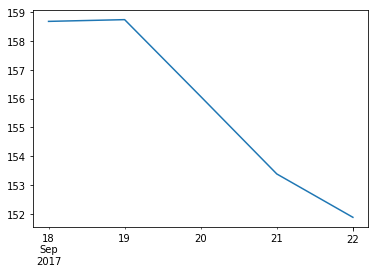

In [39]:
aapl_5d.plot() 

`.plot()` is a nice wrapper around `pyplot.plot` from Matplotib, which we'll see next week.     
Ref: http://pandas.pydata.org/pandas-docs/version/0.13/visualization.html

# Classwork (Start here in class)
- Course Schedule Part 3
- Health Stats Part 4
- If time permits, start in on your homework 

# Homework (Do at home)
The following is due before class next week:
- Any remaining classwork from tonight
- DataCamp: "Logic, Control Flow, and Filtering" and the "Loops" chapters
- Study for Quiz 4 (Pandas and Numpy)
    - Suggestion: read any documentation linked on the slides from the last three weeks

Please email chuntley@fairfield.edu if you have any problems or questions.